In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Data Analysis with Pandas: Visualizations

In [30]:
titanic = pd.read_csv('../datasets/titanic/titanic.csv')

# Some data preparation
titanic.drop(1309, axis=0, inplace=True)
titanic.drop(['ticket','boat','body'], axis=1, inplace=True)
most_popular_embarked = titanic['embarked'].value_counts().idxmax()
titanic['embarked'].fillna(value=most_popular_embarked, inplace=True)
titanic['missing_age'] = titanic['age'].isnull()
titanic['age'].fillna(value=titanic['age'].median(), inplace=True)
titanic['fare'].fillna(value=titanic['fare'].median(), inplace=True)

diabetes = pd.read_csv('../datasets/diabetes.csv')

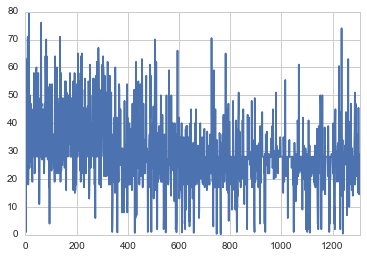

In [72]:
titanic['age'].plot()

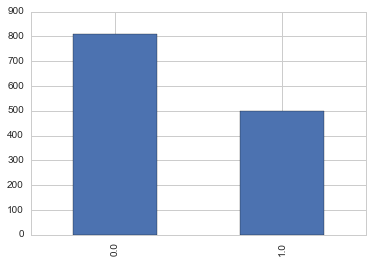

In [71]:
titanic['survived'].value_counts().plot(kind='bar')

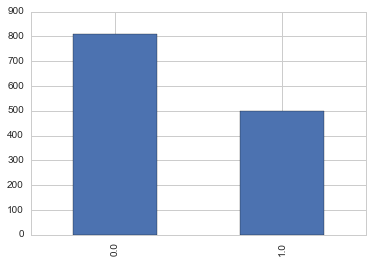

In [19]:
# Make this visualization more informative
fig, ax = plt.subplots()
titanic['survived'].value_counts().plot(kind='bar', ax=ax);

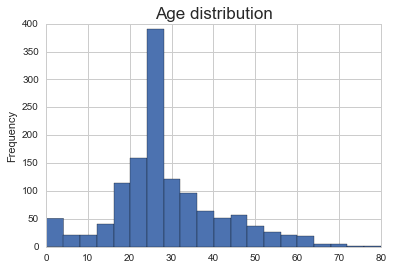

In [8]:
fig, ax = plt.subplots()
titanic['age'].plot(kind='hist', bins = 20, ax=ax)
ax.set_title('Age distribution', size = 17)

## Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Some of the features that seaborn offers are

* Several built-in themes that improve on the default matplotlib aesthetics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations

Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

The plotting functions try to do something useful when called with a minimal set of arguments, and they expose a number of customizable options through additional parameters. Some of the functions plot directly into a matplotlib axes object, while others operate on an entire figure and produce plots with several panels. In the latter case, the plot is drawn using a Grid object that links the structure of the figure to the structure of the dataset in an abstract way.

Because seaborn uses matplotlib, the graphics can be further tweaked using matplotlib tools and rendered with any of the matplotlib backends to generate publication-quality figures. Seaborn can also be used to target web-based graphics through the mpld3 and Bokeh libraries.

Seaborn should be thought of as a complement to matplotlib, not a replacement for it. When using seaborn, it is likely that you will often invoke matplotlib functions directly to draw simpler plots already available through the pyplot namespace. Further, while the seaborn functions aim to make plots that are reasonably “production ready” (including extracting semantic information from Pandas objects to add informative labels), full customization of the figures will require a sophisticated understanding of matplotlib objects.

### Exploring relationships

#### Is there a relashionship between age and fare?

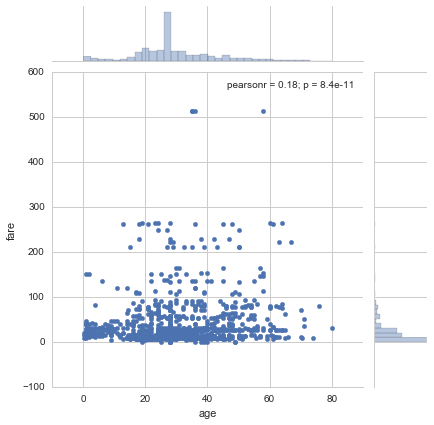

In [31]:
sns.jointplot(x='age', y='fare', data=titanic);

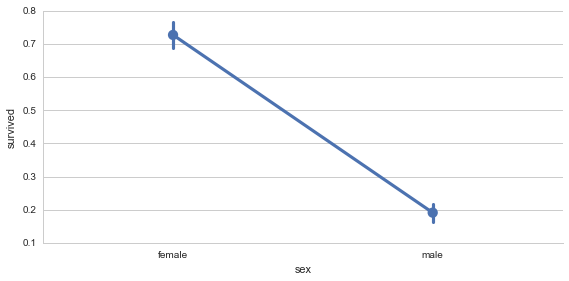

In [23]:
sns.factorplot(x='sex', y='survived', data=titanic, aspect=2);

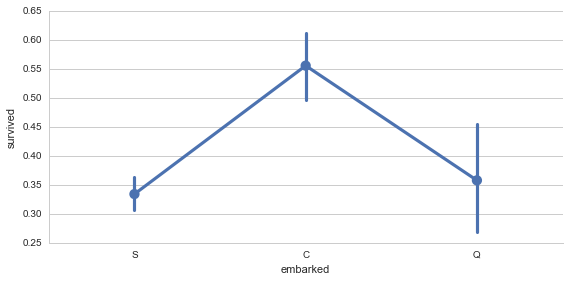

In [24]:
sns.factorplot(x='embarked', y= 'survived', data=titanic, aspect=2)

## Exploring the Diabetes dataset

In [32]:
to_fill_na = ['Cholesterol','hdl','ratio','height','weight','waist','hip']
for var in to_fill_na:
    diabetes[var].fillna(diabetes[var].median(), inplace=True)
    
diabetes['frame'].fillna(value='medium', inplace=True)

diabetes['height'] = 2.54*diabetes['height']
diabetes['weight'] = 0.454*diabetes['weight']

diabetes.rename(columns={'Cholesterol':'cholesterol'}, inplace=True)

In [135]:
diabetes.columns

Index([u'id', u'cholesterol', u'stab.glu', u'hdl', u'ratio', u'glyhb', u'age',
       u'gender', u'height', u'weight', u'frame', u'bp.1s', u'bp.1d', u'waist',
       u'hip', u'time.ppn'],
      dtype='object')

## Most used plots depending on variable type

### One numerical variable: histogram, density plot

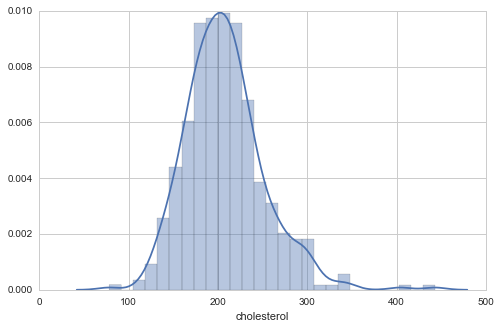

In [134]:
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(diabetes['cholesterol']);

### One categorical variable: barplots

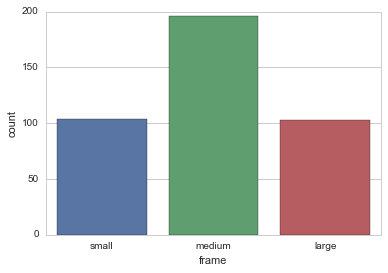

In [141]:
sns.countplot(x='frame', data=diabetes, order=['small','medium','large']);

### Two numerical variables: scatter plot, jointplot

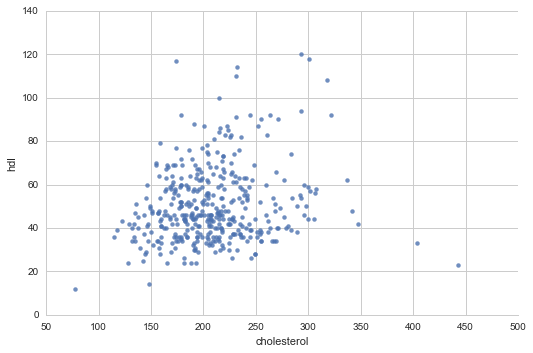

In [117]:
sns.lmplot(x='cholesterol', y='hdl', data=diabetes, fit_reg=False, aspect=1.5);

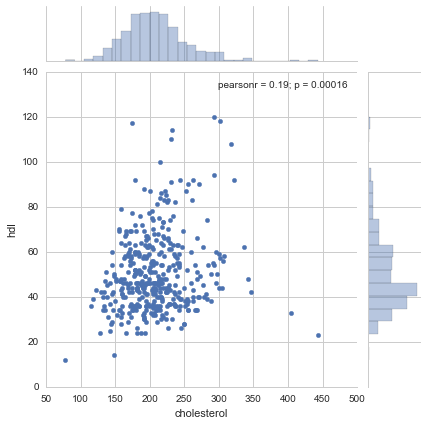

In [143]:
sns.jointplot(x='cholesterol', y='hdl', data=diabetes)

### Numerical vs. Categorical: boxplot, factor plot

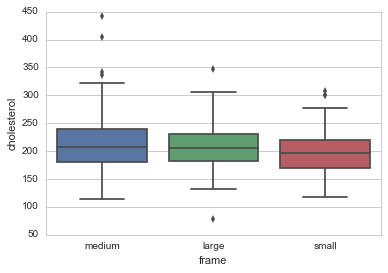

In [139]:
sns.boxplot(x='frame', y='cholesterol', data=diabetes, order=['small','medium','large']);

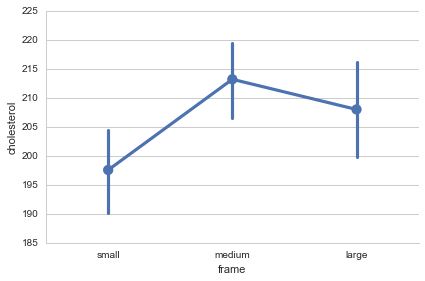

In [146]:
sns.factorplot(x='frame', y='cholesterol', data=diabetes, aspect=1.5, order=['small','medium','large']);

### Two categorical variables: stacked bars and grouped bars

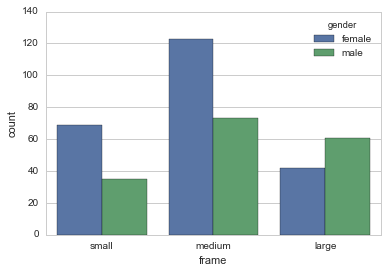

In [148]:
sns.countplot(x='frame', hue='gender', data=diabetes, order=['small','medium','large']);

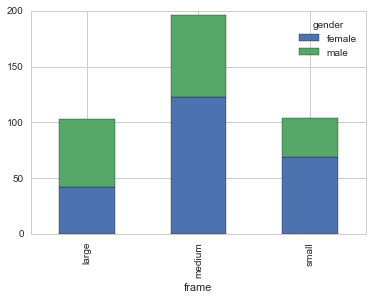

In [150]:
diabetes.groupby(['frame','gender']).count()['id'].unstack().plot(kind="bar", stacked=True);

In [153]:
diabetes['more_than_50'] = diabetes['age'] > 50

### More than two variables? where art comes into play

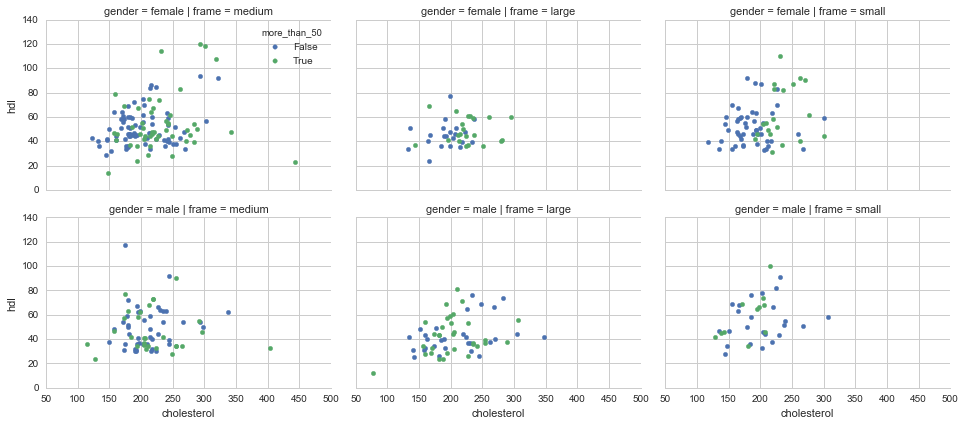

In [163]:
myplot = sns.FacetGrid(diabetes, row='gender', col='frame', hue='more_than_50', aspect=1.5, legend_out=False)
myplot.map(plt.scatter, 'cholesterol', 'hdl')
myplot.add_legend();

In [167]:
titanic.columns

Index([u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'fare', u'cabin', u'embarked', u'home.dest', u'missing_age'],
      dtype='object')

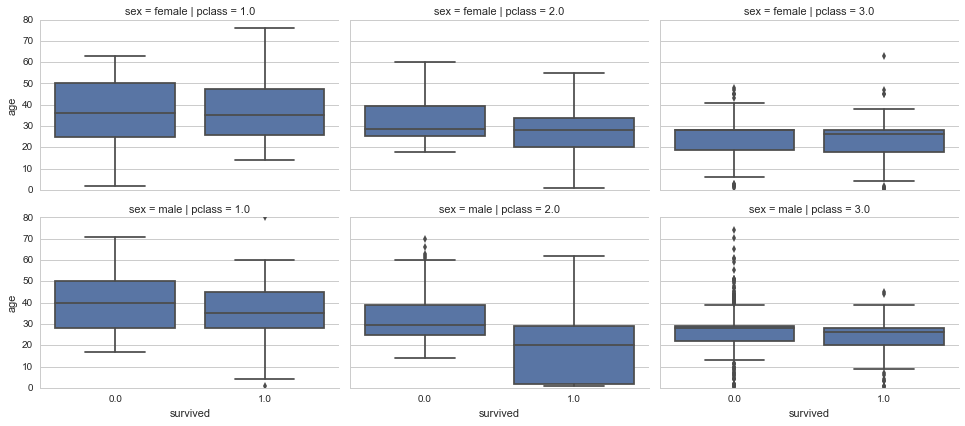

In [175]:
myplot = sns.FacetGrid(titanic, row='sex', col='pclass', aspect=1.5)
myplot = myplot.map(sns.boxplot, 'survived', 'age')